# Imports

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/marcos/computacion/metodos_numericos_2c_2024/film-genre-classifier/film-classifier/")
from classifier import *

## Experimento 1: Analisis de convergencia

In [ ]:
print("Corriendo Experimento 1...")

In [48]:
D = np.diag([1,2,3,4,5])
M = trucoHouseholder(D)
print(eigenvalues.decomposition(M,100,1e-7)[0])

[5. 4. 3. 2. 1.]


In [50]:
reps = 1000
iterations = 1000
tolerance = 1e-7

lenE = 50
es = np.logspace(start=-4, stop=0, num=lenE)

errores = np.zeros((lenE, reps))
iteraciones = np.zeros((lenE, reps))

for i, e in enumerate(es):
    for r in range(reps):
      D = np.diag(np.array([10,10-e,5,2,1], dtype=np.float64))
      M = trucoHouseholder(D)
      S, V, h = eigenvalues.decompositionIterations(M,iterations,tolerance)
      errores[i][r] = LA.norm((M@V - V@np.diag(S)), ord=2)
      iteraciones[i][r] = np.mean(h)

In [ ]:
Y = errores.mean(axis=1)
desvio = errores.std(axis=1)
fig1, ax = plt.subplots()

ax.errorbar(es, Y, desvio, fmt='o', capsize=5)

ax.set_xlabel('Parametro e')
ax.set_ylabel('Error ||Av-λv||_2')
ax.set_title("Error relativo para cambios de entrada")
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig('figuras/convergencia_error_log.png', bbox_inches='tight')

In [ ]:
Y = errores.mean(axis=1)
desvio = errores.std(axis=1)
fig1, ax = plt.subplots()

ax.errorbar(es, Y, desvio, fmt='o', capsize=5)

ax.set_xlabel('Parametro e')
ax.set_ylabel('Error ||Av-λv||_2')
ax.set_title("Error relativo para cambios de entrada")
ax.set_xscale('log')
plt.savefig('figuras/convergencia_error_lineal.png', bbox_inches='tight')

In [ ]:
Y = iteraciones.mean(axis=1)
desvio = iteraciones.std(axis=1)

fig1, ax = plt.subplots()

ax.errorbar(es, Y, desvio, fmt='o')

ax.set_xlabel('Parametro e')
ax.set_ylabel('promedio # iteraciones')
ax.set_title("Cantidad de iteraciones para cambios de entrada")
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig('figuras/convergencia_iteraciones.png', bbox_inches='tight')

# 3.a KNN test
k = 5
80/20 train/test

In [8]:
K = 5
for Q in [500,1000,5000]:
    print("Q =", Q)
    
    df_train, df_test = separate_test_data(import_data())
    X_train, y_train = document_term_matrix(df_train, Q)
    X_test, y_test = test_document_term_matrix(df_test, df_train, Q)
    
    X_train = normalize_data(X_train)
    X_test = normalize_data(X_test)
    vecinos = calcular_vecinos(X_train, X_test)
    
    promedio_k_fijo = medir_exactitud(vecinos, y_train, y_test, K)
    
    print("Resultados Experimento 2:")
    print("Con k: ", K, ", exactitud obtenida: ", promedio_k_fijo, sep = '')

Q = 500
Resultados Experimento 2:
Con k: 5, exactitud obtenida: 0.75
Q = 1000
Resultados Experimento 2:
Con k: 5, exactitud obtenida: 0.8375
Q = 5000
Resultados Experimento 2:
Con k: 5, exactitud obtenida: 0.8375


# 3.b K exploration


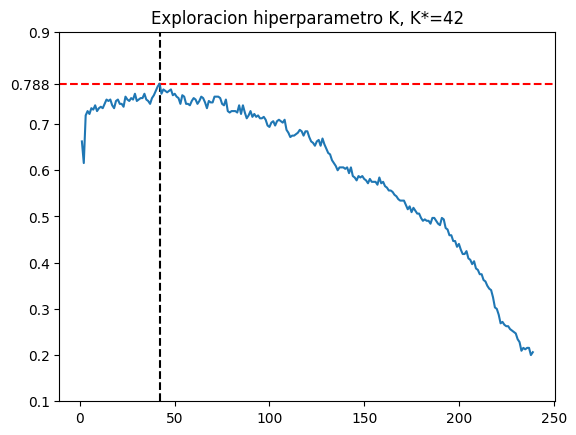

In [35]:
mejor_k = np.argmax(promedio_aciertos_k)
exac_mejor_k = promedio_aciertos_k[mejor_k]
f, ax = plt.subplots(1)
plt.axvline(x=mejor_k, color="k", linestyle="--")
plt.axhline(y=exac_mejor_k, color="r", linestyle="--")

plt.plot(range(1,k_maximo), promedio_aciertos_k[1:k_maximo])

titulo = "Exploracion hiperparametro K, K*=" + str(mejor_k)
plt.title(titulo)

yt = ax.get_yticks()
yt = np.append(yt,exac_mejor_k)

ytl = yt.tolist()
ytl[-1] = exac_mejor_k

ytl = list(filter(lambda x : abs(x - 0.8) > 0.001, ytl))
yt = list(filter(lambda x : abs(x - 0.8) > 0.001, yt))

ytl = [f"{tick:.3g}" for tick in ytl]
ax.set_yticks(yt)
ax.set_yticklabels(ytl)

ticks = [tick for tick in plt.gca().get_yticks() if tick >=0]
ax.set_yticks(ticks)

plt.savefig('../results/figures/exploracion_param_k_zoom.png', bbox_inches='tight')

# 4: PCA
Preprocesar los datos de entrenamiento con PCA, usando la implementación del método de la potencia para encontrar los autovectores de la matriz de covarianza.
Visualizar la cantidad de varianza explicada en función de la cantidad de componentes p.

In [ ]:
print("Corriendo Experimento 4...")

In [8]:
# Fueron hallados con los siguientes parametros
Q = 1000
df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)
S, V = covarianceMatrixEVD(X_train, 100, 1e-7) # iteraciones, precision

In [6]:
# save_variable((S, V), "S_V_covMatEVD")
save_variable(S, "S_covMatEVD")
save_variable(V, "V_covMatEVD")

Resultado de Experimento 4:
Numero de componentes que explican 95% de la varianza 149
-0.00033022555202812657


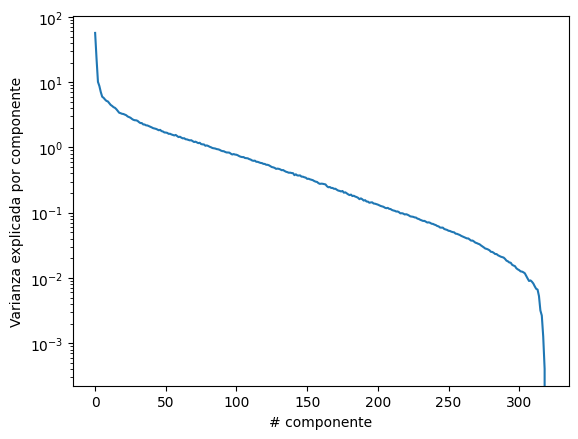

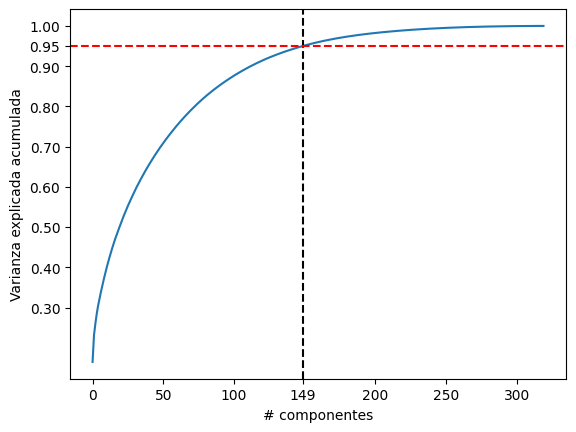

In [27]:
var_cumu = np.cumsum(S) / np.sum(S)
p_95 = np.argmax(var_cumu > 0.95)

print("Resultado de Experimento 4:")
print("Numero de componentes que explican 95% de la varianza", p_95)
fig1, ax1 = plt.subplots()

ax1.semilogy(S[:320])  # Primeras 200 componentes
ax1.set_ylabel("Varianza explicada por componente")
ax1.set_xlabel('# componente')
fig1.savefig('../results/figures/varianza_por_componente.png', bbox_inches='tight')

fig2, ax2 = plt.subplots()
ax2.plot(var_cumu[:320])
ax2.axvline(x=min(p_95, 199), color="k", linestyle="--")  # p_95 no exceda 199
ax2.axhline(y=0.95, color="r", linestyle="--")
ax2.set_ylabel("Varianza explicada acumulada")
ax2.set_xlabel('# componentes')

# Set x-ticks
xticks2 = [i for i in range(0, 150, 50)] + [i for i in range(200, 320, 50)]
xticks2.append(min(p_95, 300))
ax2.set_xticks(xticks2)

# Set y-ticks
yticks2 = [i / 10.0 for i in range(3, 11, 1)]
yticks2.append(0.95)
ax2.set_yticks(yticks2)

fig2.savefig('../results/figures/varianza_explicada.png', bbox_inches='tight')


# 5: Pipeline final - Exploración conjunta de los hiperparámetros k de KNN, y p de PCA.

Configurar y correr.

In [ ]:
print("Corriendo Experimento 5...")

In [32]:
k_minimo = 1
Q = default_Q
ps = np.concatenate((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 1000, 50)))

X_train, y_train, X_test, y_test = prepare_data()

V_folds = load_folds_covMatEVD()

k_maximo = X_train.shape[0] - (X_train.shape[0] // 4)

In [33]:
promedios_p_k = four_fold_cross_validation_k_p_exploration(V_folds, X_train, y_train, k_maximo, ps)

100 %!


In [35]:
save_variable(promedios_p_k, "promedios_p_k")

In [36]:
# Hallar k* y p*
# k_maximo, ps, promedios_p_k = load_variable(file_name['exploracion_p_k'])

P_optimo, K_optimo, mejorExactitud = arg_max_p_k(ps, k_maximo, promedios_p_k)
print("Resultados cross validation, exploracion de k en: [1,", k_maximo,"] y p en:", ps)
print("P*: ", P_optimo, " K*: ", K_optimo, " Exa: ", mejorExactitud, sep='')

Resultados cross validation, exploracion de k en: [1, 240 ] y p en: [  1   2   3   4   5   6   7   8   9  10  20  30  40  50  60  70  80  90
 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]
P*: 400 K*: 48 Exa: 0.79375


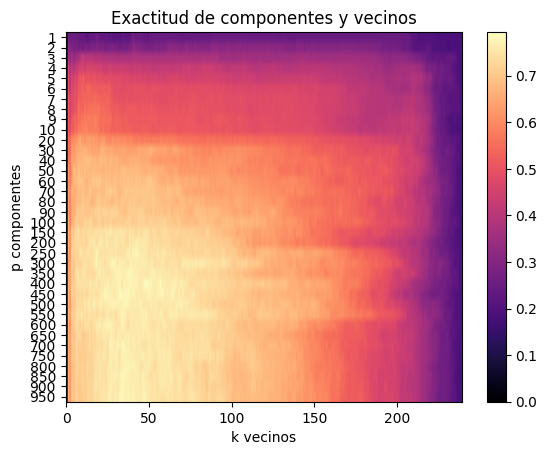

<Figure size 640x480 with 0 Axes>

In [39]:
plt.imshow(promedios_p_k, aspect='auto', cmap='magma')
plt.colorbar()
plt.title("Exactitud de componentes y vecinos")
plt.xlabel("k vecinos")
plt.ylabel("p componentes")

plt.yticks(ticks=range(len(ps)), labels=ps)

plt.show()
plt.savefig('../results/figures/cross_validation_k_p.png', bbox_inches='tight')

In [ ]:
### Paso final: Usar los k* y p* para medir la exactitud en el conjunto de prueba

In [ ]:
print("Prueba final, entrenando con todos los de entrenamiento y midiendo en test")
X_train, y_train, X_test, y_test = prepare_data()
S, V = covarianceMatrixEVD(X_train, 100, 1e-7)

X_train = normalize_data(X_train)
X_test = normalize_data(X_test)

pca_train = reduce_dimensionality(X_train, V, P_optimo)
pca_test = reduce_dimensionality(X_test, V, P_optimo)

vecinos = calcular_vecinos(pca_train, pca_test)

exactitud_en_datos_test = medir_exactitud(vecinos, y_train, y_test, K_optimo)

print("Con k*: ", K_optimo, " y p*:", P_optimo, " exactitud obtenida: ", exactitud_en_datos_test, sep = '')

# 6: TF-IDF
Transformar la matriz de conteo de palabras con el proceso TF-IDF (del inglés Term
frequency – Inverse document frequency), aplicar la búsqueda de hiper-parámetros a
esta nueva matriz de datos y reportar las diferencias.

In [ ]:
print("EXPERIMENTO 6: TF-IDF")

In [64]:
Q = 1000
df_train, df_test = separate_test_data(import_data())
X_train, y_train = document_term_matrix(df_train, Q)
X_train, y_train = balancear_clases(X_train, y_train)
X_test, y_test = test_document_term_matrix(df_test, df_train, Q)

idf = inverse_document_frequency_matrix(df_train, Q)

idf_train = np.tile(idf.T, (320,1))
idf_test = np.tile(idf.T, (80,1))

X_train = X_train * idf_train
X_test = X_test * idf_test

V_folds = []
for i in range(4):
    print_avance(i, 0, 4, 1)
    X_newtrain, X_dev, y_newtrain, y_dev = separate_dev_data(X_train, y_train, i)
    S, V = covarianceMatrixEVD(X_newtrain, 100, 1e-7)
    V_folds.append(V)

100 %!


In [65]:
k_maximo = X_train.shape[0] - (X_train.shape[0] // 4)
ps = np.concatenate((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 1000, 50)))

exactitud_p_k = four_fold_cross_validation_k_p_exploration(V_folds, X_train, y_train, k_maximo, ps, False)

100 %!


In [66]:
P_optimo, K_optimo, mejorExactitud = arg_max_p_k(ps, k_maximo, promedios_p_k)
print("Resultados cross validation, exploracion de k en: [1,", k_maximo,"] y p en:", ps)
print("P*: ", P_optimo, " K*: ", K_optimo, " Exa: ", mejorExactitud, sep='')

Resultados cross validation, exploracion de k en: [1, 240 ] y p en: [  1   2   3   4   5   6   7   8   9  10  20  30  40  50  60  70  80  90
 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]
P*: 20 K*: 9 Exa: 0.703125


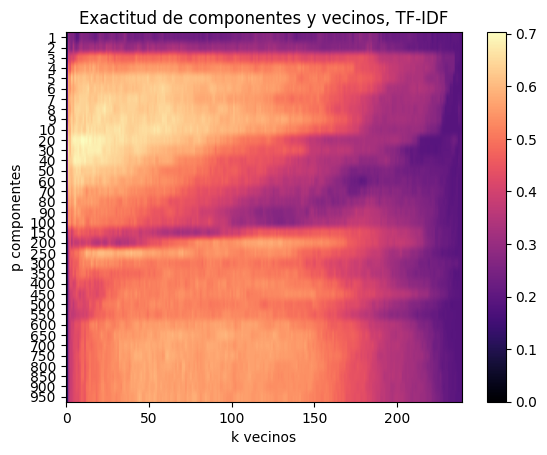

<Figure size 640x480 with 0 Axes>

In [68]:
plt.imshow(promedios_p_k, aspect='auto', cmap='magma')
plt.colorbar()
plt.title("Exactitud de componentes y vecinos, TF-IDF")
plt.xlabel("k vecinos")
plt.ylabel("p componentes")

plt.yticks(ticks=range(len(ps)), labels=ps)

plt.show()
plt.savefig('../results/figures/cross_validation_k_p_tf_idf.png', bbox_inches='tight')

# 7 Distancia Euclidea

In [ ]:
print("Experimento 7: Distancia euclidea")

In [41]:
Q = 1000

k_minimo = 1
Q = default_Q
ps = np.concatenate((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 1000, 50)))

X_train, y_train, X_test, y_test = prepare_data()

V_folds = load_folds_covMatEVD()

k_maximo = X_train.shape[0] - (X_train.shape[0] // 4)

In [42]:
promedios_p_k = four_fold_cross_validation_k_p_exploration(V_folds, X_train, y_train, k_maximo, ps, False)

100 %!


In [44]:
P_optimo, K_optimo, mejorExactitud = arg_max_p_k(ps, k_maximo, promedios_p_k)
print("Resultados cross validation, exploracion de k en: [1,", k_maximo,"] y p en:", ps)
print("P*: ", P_optimo, " K*: ", K_optimo, " Exa: ", mejorExactitud, sep='')

Resultados cross validation, exploracion de k en: [1, 240 ] y p en: [  1   2   3   4   5   6   7   8   9  10  20  30  40  50  60  70  80  90
 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]
P*: 20 K*: 9 Exa: 0.703125


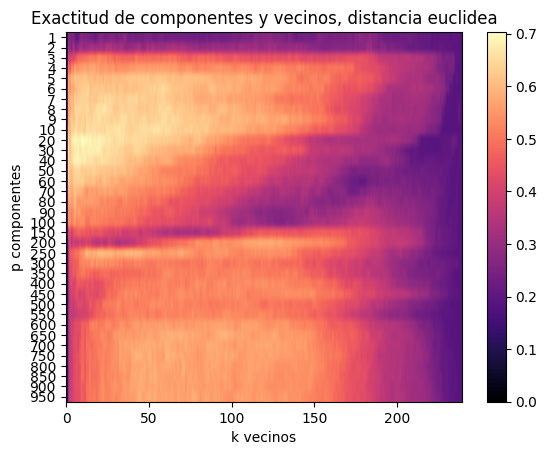

<Figure size 640x480 with 0 Axes>

In [45]:
plt.imshow(promedios_p_k, aspect='auto', cmap='magma')
plt.colorbar()
plt.title("Exactitud de componentes y vecinos, distancia euclidea")
plt.xlabel("k vecinos")
plt.ylabel("p componentes")

plt.yticks(ticks=range(len(ps)), labels=ps)

plt.show()
plt.savefig('../results/figures/cross_validation_k_p_euclid_distance.png', bbox_inches='tight')

# 8 Variante Cross-Validation

In [8]:
k_minimo = 1
Q = default_Q
# ps = np.arange(1, 250, 25)
ps = np.concatenate((np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 1000, 50)))

X_train, y_train, X_test, y_test = prepare_data()

V_folds = load_folds_covMatEVD()

k_maximo = X_train.shape[0] - (X_train.shape[0] // 4)
tam_fold = X_train.shape[0] // 4

In [9]:
l_ps = len(ps)
clasificaciones_p_k = np.zeros((len(ps),k_maximo, X_train.shape[0]))

for i in range(4):  #fold
    X_newtrain, X_dev, y_newtrain, y_dev = separate_dev_data(X_train, y_train, i)
    X_newtrain_normalized = normalize_data(X_newtrain)
    X_dev_normalized = normalize_data(X_dev)

    for j, p in enumerate(ps):  #componentes
        print_avance(i, j, 4, l_ps)

        pca_newtrain = reduce_dimensionality(X_newtrain_normalized, V_folds[i], p)
        pca_dev = reduce_dimensionality(X_dev_normalized, V_folds[i], p)
        vecinos = calcular_vecinos(pca_newtrain, pca_dev)

        for k in range(1, k_maximo):  #vecinos
            predicciones = clasificar(vecinos, y_newtrain, k)
            clasificaciones_p_k[j][k][i*tam_fold : (i+1)*tam_fold] = predicciones.flatten()

100 %!


In [17]:
promedio_exactitud_p_k = np.zeros((l_ps, k_maximo))
for p in range(l_ps):
    for k in range(1, k_maximo):
        correctas = len(y_train) - np.count_nonzero((clasificaciones_p_k[p][k]) - y_train.flatten())
        totales = len(y_train)
        promedio_exactitud_p_k[p][k] = correctas / totales
        # promedio_exactitud_p_k[p][k] = correctas / (np.count_nonzero((clasificaciones_p_k[p][k]) - y_train.flatten()))

Resultados cross validation, exploracion de k en: [1, 240 ] y p en: [  1   2   3   4   5   6   7   8   9  10  20  30  40  50  60  70  80  90
 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]
P*: 400 K*: 48 Exa: 0.79375


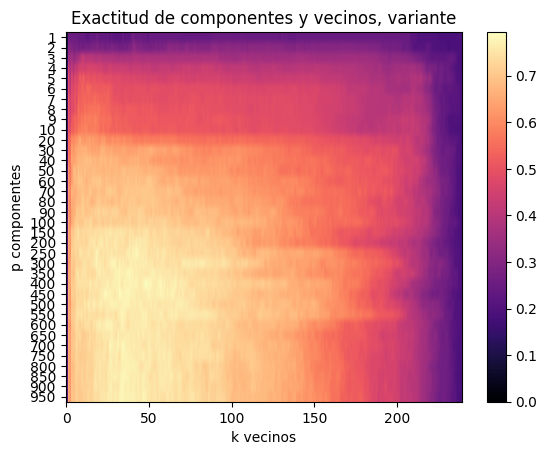

In [18]:
P_optimo, K_optimo, mejorExactitud = arg_max_p_k(ps, k_maximo, promedio_exactitud_p_k)
print("Resultados cross validation, exploracion de k en: [1,", k_maximo,"] y p en:", ps)
print("P*: ", P_optimo, " K*: ", K_optimo, " Exa: ", mejorExactitud, sep='')

plt.imshow(promedio_exactitud_p_k, aspect='auto', cmap='magma')
plt.colorbar()
plt.title("Exactitud de componentes y vecinos, variante")
plt.xlabel("k vecinos")
plt.ylabel("p componentes")

plt.yticks(ticks=range(len(ps)), labels=ps)
plt.savefig('../results/figures/cross_validation_k_p_variante.png', bbox_inches='tight')
plt.show()

# Resultados cross validation, exploracion de k en: [1, 240 ] y p en: [  1  26  51  76 101 126 151 176 201 226]
# P*: 226 K*: 42 Exa: 0.7781250000000001

In [ ]:
plt.show() # Abre todos los graficos desde la terminal